In [1]:
##1) Extract reviews of any product from ecommerce website like amazon
##2) Perform emotion mining

In [2]:
# Import Libraries
import numpy as np
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
reviews=pd.read_csv("C:/Users/Vijay Rathod/Downloads/Musical_Instruments_5.csv",encoding ='latin-1')
reviews

,X
0,"{""."": ""A2IBPI20UZIR0U"", ""asin"": ""1384719342"", ..."
1,"{"" "": ""A14VAT5EAX3D9S"", ""asin"": ""1384719342"", ..."
2,"{""."": ""A195EZSQDW3E21"", ""asin"": ""1384719342"", ..."
3,"{""."": ""A2C00NNG1ZQQG2"", ""asin"": ""1384719342"", ..."
4,"{""."": ""A94QU4C90B1AX"", ""asin"": ""1384719342"", ""..."
...,...
10109,"{""."": ""A1TJ393OFP21I8"", ""asin"": ""B00BU9KCXK"", ..."
10110,"{""."": ""A34O0KQV4QXWNQ"", ""asin"": ""B00BU9KCXK"", ..."
10111,"{""."": ""A120FZ2ESIMA63"", ""asin"": ""B00BU9KCXK"", ..."
10112,"{""."": ""A1PO2WOQ0LO73Y"", ""asin"": ""B00BU9KCXK"", ..."


In [4]:
reviews = [X.strip() for X in reviews.X] 
reviews = [X for X in reviews if X] 
reviews[0:10]

['{".": "A2IBPI20UZIR0U", "asin": "1384719342", ".": "cassandra tu \\"Yeah, well, that\'s just like, u...", "helpful": [0, 0], ".": "Not much to write about here, but it does exactly what it\'s supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", "overall": 5.0, "summary": "good", "..": 1393545600, ".": "02 28, 2014"}',
 '{" ": "A14VAT5EAX3D9S", "asin": "1384719342", "": "Jake", "helpful": [13, 14], ".": "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent\'s sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work j

In [5]:
# Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = reviews[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [6]:
for token in doc_block[0:20]:
    print(token, token.pos_)

{ PUNCT
" PUNCT
. PUNCT
" PUNCT
: PUNCT
" PUNCT
A1GMWTGXW682 PROPN
GB PROPN
" PUNCT
, PUNCT
" PUNCT
asin PROPN
" PUNCT
: PUNCT
" PUNCT
B000068NSX VERB
" PUNCT
, PUNCT
" PUNCT
. PUNCT


In [7]:
# Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['connectors', 'fault', 'thing', 'consider', 'cable', 'tighten', 'connectors', 'hear', 'rattle', 'seems', 'retro', 'look', 'screw', 'connectors', 'rubber', 'cable', 'looks', 'works', 'have', 'cable']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#Counting tokens again
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,cable,5
1,connectors,3
2,looking,2
3,works,2
4,use,2
5,b000068nsx,1
6,bent,1
7,fault,1
8,thing,1
9,consider,1


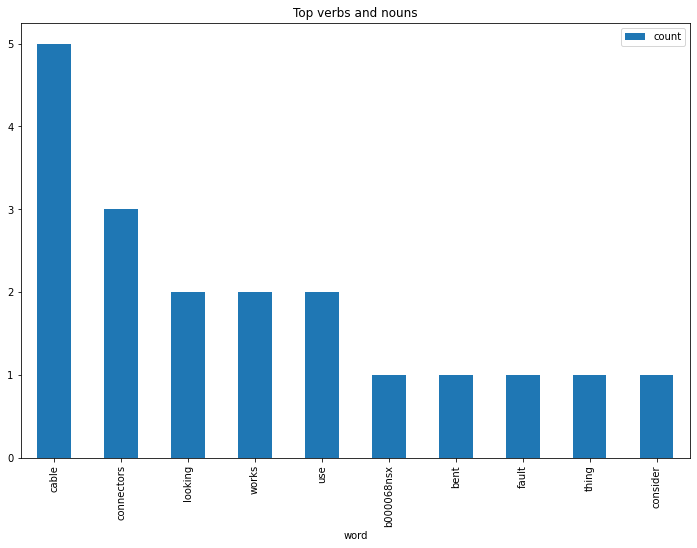

In [9]:
# Visualizing results
# Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

In [10]:
## Emotion Mining

In [11]:
# Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [12]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [13]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [14]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences[5:15]

['now my recordings are much more crisp.',
 'it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,", "overall": 5.0, "summary": "good", "..": 1393545600, ".',
 '": "02 28, 2014"} {" ": "A14VAT5EAX3D9S", "asin": "1384719342", "": "Jake", "helpful": [13, 14], ".',
 '": "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent\'s sake, I cannot stop putting the pop filter next to my nose and smelling it after recording.',
 ':DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product!',
 ':]", "overall": 5.0, "summary": "Jake", "..": 1363392000, ".',
 '": "03 16, 2013"} {".',
 '": "A195EZSQDW

In [15]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"{""."
1,""": ""A2IBPI20UZIR0U"", ""asin"": ""1384719342"", ""."
2,""": ""cassandra tu \""Yeah, well, that's just lik..."
3,""": ""Not much to write about here, but it does ..."
4,filters out the pop sounds.
...,...
93818,""", "".."": 1378425600, ""."
93819,""": ""09 6, 2013""} {""."
93820,""": ""A3KOWHTH4J4ZIK"", ""asin"": ""B00BU9KCXK"", ""."
93821,""": ""DJB"", ""helpful"": [0, 0], ""."


In [16]:
# Custom function :score each word in a sentence in lemmatised form, 
# but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [17]:
# test that it works
calculate_sentiment(text = 'very sad')

-2

In [18]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [19]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     1
1     5
2    13
3    15
4     5
5     7
6    32
7    15
8    74
9    30
Name: word_count, dtype: int64

In [20]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
79690,""": ""There really is nothing not to like about ...",23,100
54326,have been playing finger style only - usually ...,24,216
527,""": ""Hosa cable quality can be all over the pla...",24,112
62123,"its very easy to use and program, I did not ha...",24,137
65548,"Solid, nice sound, very good quality to make a...",26,89
49260,Nice clean boost and a good overdrive sound wh...,26,172
12868,""": ""Great great great great great great great ...",27,10
47535,""": ""what a nice clear sound it has,,and smooth...",27,140
70043,""": ""These days on my pedal board I have severa...",30,244
52996,""": ""nice good like fine great fantastic like l...",40,30


In [21]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    93823.000000
mean         1.083146
std          2.032627
min        -13.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         40.000000
Name: sentiment_value, dtype: float64

In [22]:
sent_df[sent_df['sentiment_value']>=2].head()

,sentence,sentiment_value,word_count
2,""": ""cassandra tu \""Yeah, well, that's just lik...",4,13
6,it is one of the lowest prices pop filters on ...,3,32
7,""": ""02 28, 2014""} {"" "": ""A14VAT5EAX3D9S"", ""asi...",2,15
9,":DIf you needed a pop filter, this will work j...",2,30
13,""": ""Rick Bennette \""Rick Bennette\"""", ""helpful...",2,9


In [23]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Vijay Rathod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


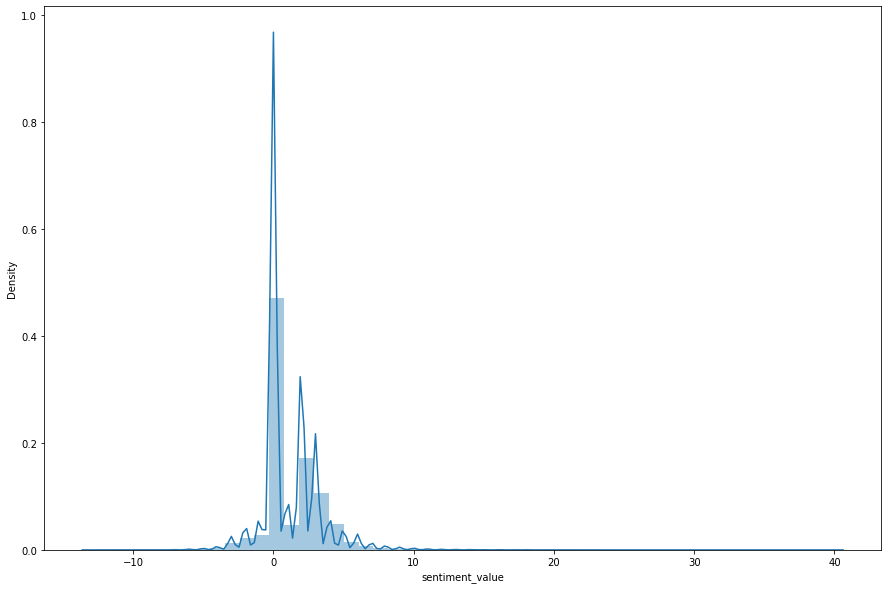

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.distplot(sent_df['sentiment_value']);

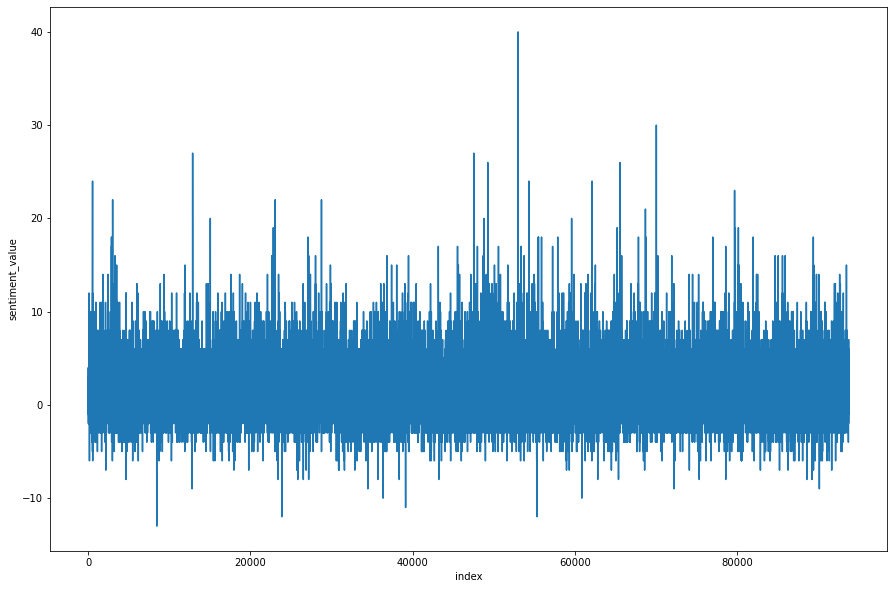

In [25]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);

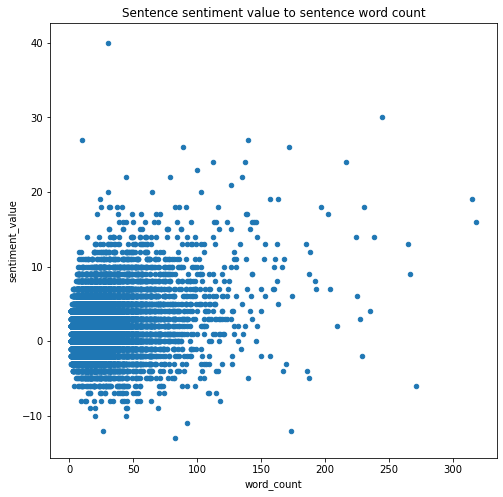

In [26]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count');